# **Atividade do Módulo Visualização de Dados**
## Aluno: Alberto Akel
### Objetivos Gerais
Realizar uma análise dos dados e destacar
as informações a partir visualização gráfica

### Objetivos Especificos
Criar os seguintes gráficos:
1. Gráfico de Histograma
2. Gráfico de dispersão
3. Mapa de calor
4. Gráfico de barra
5. Gráfico de pizza
6. Gráfico de densidade
7. Gráfico de Regressão

### Considerações

Para este exercicio foi investigado o conjunto de dados disponiveis arquivo *ecommerce_preparados.csv*. A leitura inicial permitiu avaliar e requalificar o conjunto de dados a fim de cumprir o objetivo de plotagem.

### Modificação no conjunto de dados

*   Foram removida as 3 colunas de reviews, por não serem utilizadas
*   Valores NaN da coluna Desconto foram substituídas por zero.
*   Coluna 'Gênero' foi reclassifica a fim de minizar a redundância de informação. Desta forma passando de 13 para 7 gênero de roupa.Os gêneros **bermuda feminina brilho Blogueira*, *Mulher*, *roupa para gordinha pluss P ao 52* e *short menina verão look mulher* foram substituído por *Feminino*. *Sem gênero infantil* e *Bebês* foram substituído por *Infantil*. *menino* é incluido em *Meninos*. *Sem gênero* é substituído por *Unissex*.E finalmente os valores nulos da coluna 'Gênero' são preenchidos com *S/nome*.

*   Coluna 'Temporada' foi reclassifica a fim de minizar a redundância de informação. Assim foram reduzidas a 4 temporadas das 10 temporadas inicias. As mudanças foram *primavera-verão* para *primavera/verão*, e *outono-inverno* para *outono/inverno*, além de transformar combinações de estações como *primavera/verão/outono/inverno* em *all season*. Também faz outras substituições semelhantes para garantir que todas as categorias relacionadas a estações e o ano *2021* sejam agrupadas sob *all season*.

### Descrição dos gráficos
1. Gráfico de Histograma : Distribuição dos preços
2. Gráfico de dispersão : Relação Nota e Preço do produto
3. Mapa de calor das correlação entre:
Preço,Nota,N_Avaliações,Desconto,Qtd_Vendidos_Cod,Temporada_Cod,Marca_Cod

4. Gráfico de barra : Gênero e cod. Qtd Vendidas
5. Gráfico de pizza : Percentual de vendas por Gênero
6. Gráfico de densidade : Quantidade de notas
7. Gráfico de Regressão : Relação valor dos preços por temporada.















In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

# Leitura dos arquivos
df=pd.read_csv('ecommerce_preparados.csv')


# Deletando colunas de reviews:
# Não será utilizado e difi)
df.drop(columns=['Review1', 'Review2', 'Review3'],inplace=True)

#Considerando que 'NaN' é ausencia de desconto, então NaN --> Zero
df['Desconto']=df['Desconto'].fillna(0)

#reclassificação do genero do vestuario
df.replace('bermuda feminina brilho Blogueira', 'Feminino', inplace=True)
df.replace('Mulher', 'Feminino', inplace=True)
df.replace('roupa para gordinha pluss P ao 52', 'Feminino', inplace=True)
df.replace('short menina verao look mulher', 'Feminino', inplace=True)
df.replace('Sem gênero','Unissex', inplace=True)
df.replace('Sem gênero infantil','infantil', inplace=True)
df.replace('menino','Meninos', inplace=True)
df.replace('Bebês','infantil',inplace=True)
df['Gênero'] = df['Gênero'].fillna('S/nome')

#Reclassificação da temporada
df.replace('primavera-verão', 'primavera/verão', inplace=True)
df.replace('outono-inverno', 'outono/inverno', inplace=True)
df.replace('primavera/verão/outono/inverno', 'all season', inplace=True)
df.replace('primavera-verão - outono-inverno', 'all season', inplace=True)
df.replace('primavera-verão outono-inverno', 'all season', inplace=True)
df.replace('primavera/verão outono/inverno', 'all season', inplace=True)
df.replace('2021', 'all season', inplace=True)
#Avaliando apenas as temporadas, ou mesmo, indiferenca das temporada. podemos considerar
#quando avaliamos  2021, não estamos discriminando temporada. Assim, convertir para all-season
#re_codificando
df['Temporada_Cod']=df['Temporada'].astype('category').cat.codes

resumo = pd.concat([df.notna().sum(), df.dtypes], axis=1, keys=['Não Nulos', 'Tipos'])

print('total de vendas :', len(df))
print(resumo)



total de vendas : 2199
                     Não Nulos    Tipos
Unnamed: 0                2199    int64
Título                    2199   object
Nota                      1559  float64
N_Avaliações              1559  float64
Desconto                  2199  float64
Marca                     2199   object
Material                  1332   object
Gênero                    2199   object
Temporada                 2199   object
Qtd_Vendidos              2199   object
Preço                     1964  float64
Nota_MinMax               1559  float64
N_Avaliações_MinMax       1559  float64
Desconto_MinMax            874  float64
Preço_MinMax              1964  float64
Marca_Cod                 2199    int64
Material_Cod              2199    int64
Temporada_Cod             2199     int8
Qtd_Vendidos_Cod          1973  float64
Marca_Freq                2199  float64
Material_Freq             1332  float64


#### 1. Gráfico Histograma


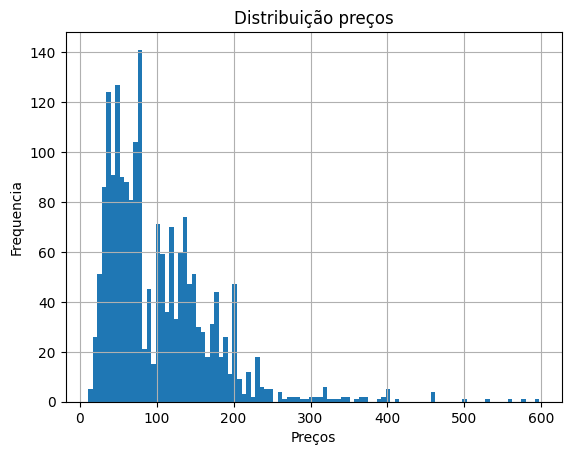

In [105]:
plt.hist(df['Preço'],bins=100)
plt.title('Distribuição preços')
plt.xlabel('Preços')
plt.ylabel('Frequencia')
plt.grid(True)

### 2. Gráfico de Dispersão

<Figure size 1000x600 with 0 Axes>

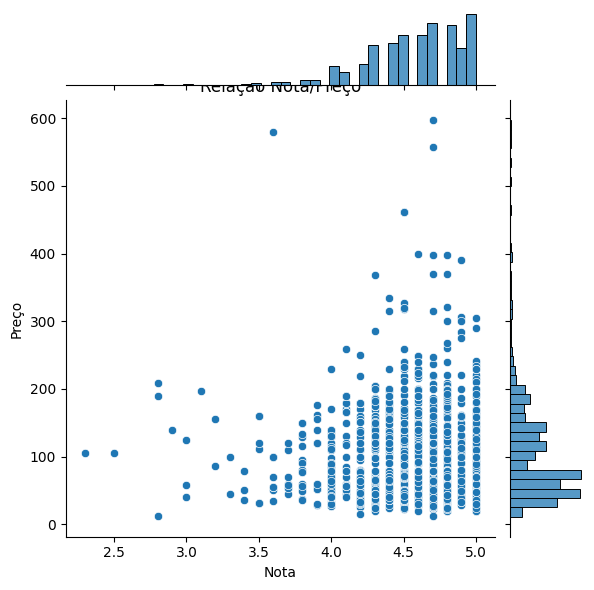

In [106]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Nota', y='Preço', data=df, kind='scatter')
#sns.pairplot(df[['Preço', 'Nota', 'N_Avaliações']])
plt.title('Relação Nota/Preço')
plt.xlabel('Nota')
plt.ylabel('Preço')
plt.show()


### 3. Mapa de calor

Text(0.5, 1.0, 'Mapa de calor da correlação entre variáveis')

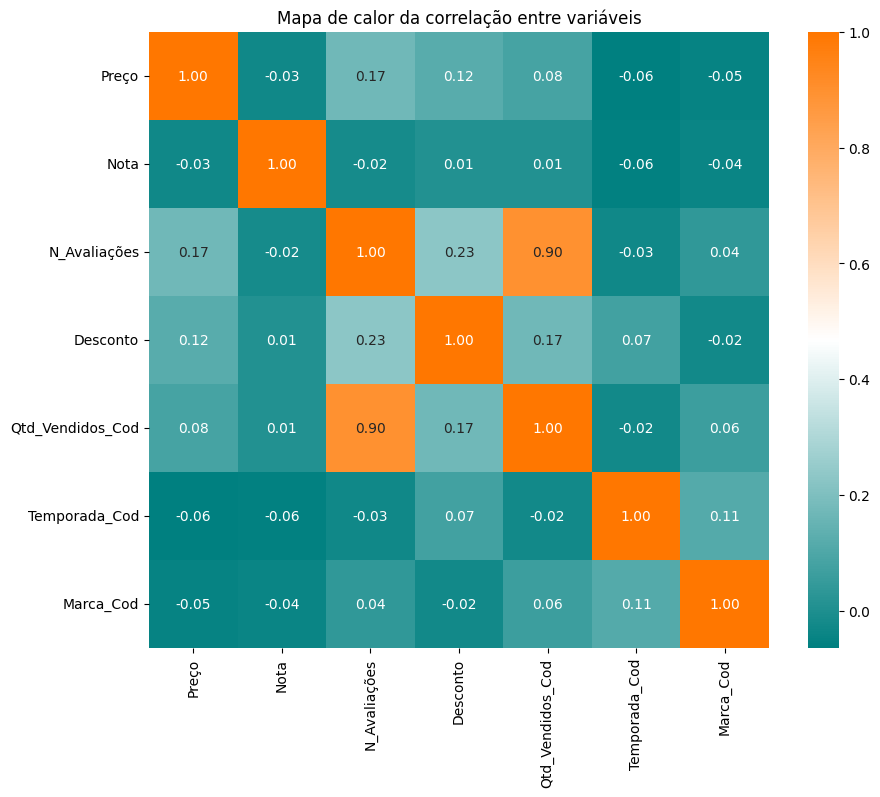

In [108]:
df_corr = df[['Preço',
              'Nota',
              'N_Avaliações',
              'Desconto',
              'Qtd_Vendidos_Cod',
              'Temporada_Cod',
              'Marca_Cod',
            ]].corr()

# Heatmap de correlação
teal_orange = LinearSegmentedColormap.from_list("TealOrange", ["#008080", "#FFFFFF", "#FF7700"])

plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, annot=True, cmap=teal_orange, fmt=".2f")
plt.title('Mapa de calor da correlação entre variáveis')


### 4. Gráfico de barra

Text(0, 0.5, 'Quantidade ')

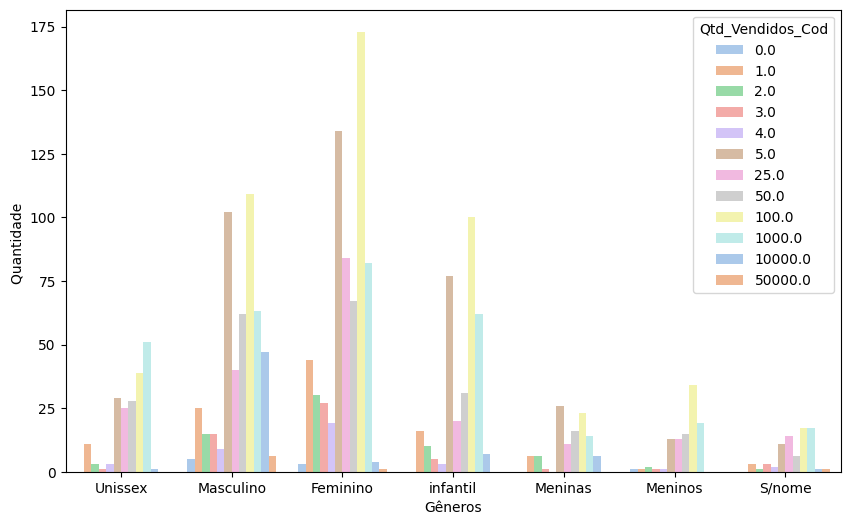

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gênero', hue='Qtd_Vendidos_Cod', data=df,palette='pastel')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade ')


### 5. Gráfico de pizza

Text(0.5, 1.0, 'Percentual de vendas por gênero')

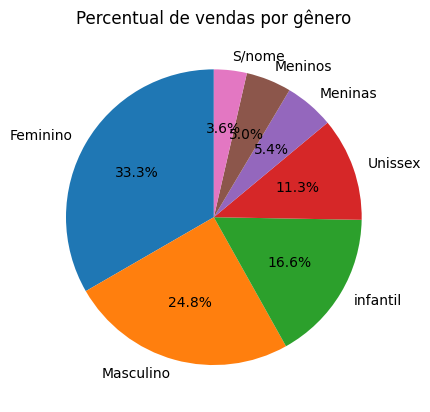

In [110]:
y=df['Gênero'].value_counts()
plt.pie(y,labels=y.keys(),autopct='%.1f%%',startangle=90)
plt.title('Percentual de vendas por gênero')


##6. Gráfico de densidade

Text(0, 0.5, 'Densidade de Notas')

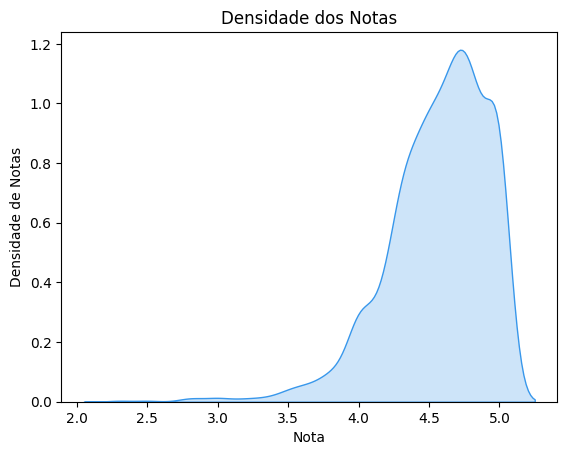

In [111]:
sns.kdeplot(df['Nota'], fill=True, color='#3897eb')
plt.title('Densidade dos Notas')
plt.xlabel('Nota')
plt.ylabel('Densidade de Notas')

## 7. Gráfico de Regressão


Text(0, 0.5, 'Preço')

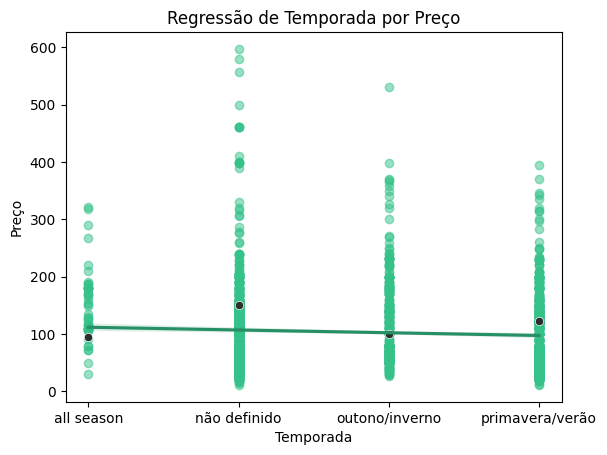

In [174]:
m_preco = df.groupby('Temporada_Cod')['Preço'].mean()
m_desconto = df.groupby('Temporada_Cod')['Desconto'].mean()

df2 = pd.DataFrame({'Temporada_Cod': df['Temporada_Cod'].unique(),
                    'Media_preco': m_preco,
                   'Media_desconto': m_desconto})

x1='Temporada_Cod'
x2='Preço'
sns.regplot(x=x1, y=x2, data=df, color='#278f65', scatter_kws={'alpha': 0.5, 'color': '#34c289'})
plt.title('Regressão de '+x1[0:-4]+' por '+ x2)

x1a='Temporada_Cod'
x2a='Media_preco'
sns.scatterplot(x=x1a,y=x2a,data=df2,color='#2b302f')

cod_temp = df[x1].unique()
nome_temp = df['Temporada'].unique()
plt.xticks(cod_temp, nome_temp)

plt.xlabel(x1[0:-4])
plt.ylabel(x2)
